## 1. Importing data and required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [4]:
#modelling
from sklearn import linear_model  # assumptions: linear relationship, independence, homeodasticity, normality, no multicolinearity
from sklearn.neighbors import KNeighborsRegressor #non stats assumptions:: The closer(euclidean distance or other) two given points/vectors are to each other, the more related and similar they are.
from sklearn.tree import DecisionTreeRegressor#non stat assumption:the whole training set is considered as the root.
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
#Randomforest assumptions: many decisions trees averaging their  decisions(bagging)
#Adaboost, Xgboost--- boosting algos
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import  Ridge, Lasso
from sklearn.linear_model import LinearRegression

#model wraper
from scikeras.wrappers import KerasRegressor 


#Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from keras.callbacks import History 
history = History()

#parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



### importing the data

In [5]:
df= pd.read_csv('stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

### We will choose to predict math score to start

In [7]:
X = df.drop(['math_score'], axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [10]:
#creating column transformer 
num_features = X.select_dtypes(exclude="object").columns
cat_features= X.select_dtypes(include= "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(

    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [10]:
X= preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}

model_list= []
r2_list = []

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train) #train model

        # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*50)
    print('\n')




Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3272
- Mean Absolute Error: 4.2786
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4095
- Mean Absolute Error: 4.2269
- R2 Score: 0.8797


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7122
- Mean Absolute Error: 4.5187
- R2 Score: 0.8553
-----------------------

In [15]:
model_results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False )

In [16]:
model_results

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879743
5,Random Forest Regressor,0.853513
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.847020
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.741471


# Ridge

In [17]:
Ridge_regressor= Ridge()

In [18]:
Ridge_regressor.fit(X_train, y_train)


Ridge()

In [19]:
y_pred= Ridge_regressor.predict(X_test)

print('score: ', r2_score(y_test, y_pred))

score:  0.8805931485028738


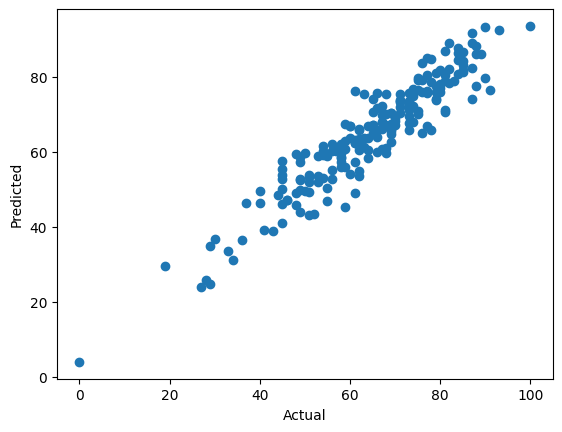

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');



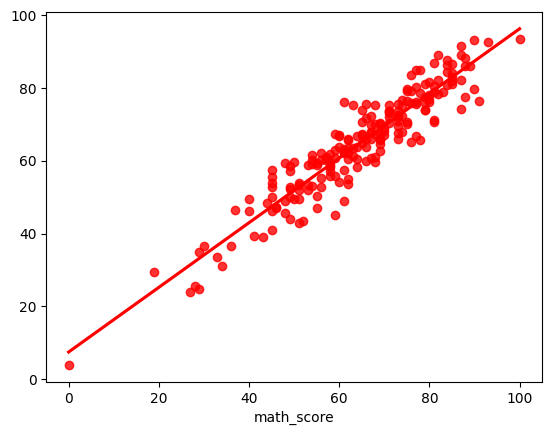

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


# Let's try a simple feed foward neural network a see if it performs better

In [25]:
normalizer =tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)
print(normalizer.mean.numpy())

[[0.52625    0.47375    0.08624998 0.19125    0.32499996 0.25249997
  0.14499998 0.22375    0.11999998 0.19874997 0.05875    0.22749998
  0.17124999 0.34625    0.65374994 0.34874997 0.65125    0.02645124
  0.02648462]]


In [26]:
#Build the model
def create_model():
    model_fnn =tf.keras.Sequential([
        #tf.keras.layers.InputLayer(input_shape=(19,)), #input layer with 19 features
        normalizer,
        tf.keras.layers.Dense(32, activation = 'relu'), #Dense layer with activtion rectified linear unit
        tf.keras.layers.Dense(1)                                #Output layer with 1 oneuron for regression
])

#compiling the model

    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
    model_fnn.compile(optimizer=sgd_optimizer, loss='mse')  #Stochastich gradient descent and mean squared error
    
    return model_fnn

# Wrap the Keras model in a scikit-learn RegressorMixin class
keras_regressor = KerasRegressor(build_fn=create_model, epochs=20, batch_size=2, verbose=1, callbacks=[history])



keras_regressor.fit(X_train, y_train)

Epoch 1/20

400/400 [==============================] - 1s 2ms/step - loss: 1598.6879
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 51.1379
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 41.1818
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 37.4132
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 34.9009
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 33.2352
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 32.5845
Epoch 8/20
400/400 [==============================] - 1s 2ms/step - loss: 31.7555
Epoch 9/20
400/400 [==============================] - 1s 2ms/step - loss: 30.8857
Epoch 10/20
400/400 [==============================] - 1s 2ms/step - loss: 30.0912
Epoch 11/20
400/400 [==============================] - 1s 2ms/step - loss: 29.9515
Epoch 12/20
400/400 [==============================] - 1s 2ms/step - loss: 29.6869
Epoch 13/2

KerasRegressor(
	model=None
	build_fn=<function create_model at 0x00000288B2035870>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=2
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.History object at 0x00000288F8B0A6B0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
)

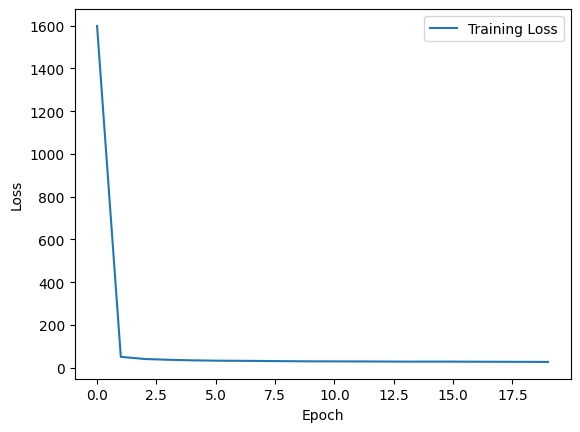

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
y_pred2= keras_regressor.predict(X_test)

# Calculate R^2 score on the test set
r2 = r2_score(y_test, y_pred2)
print(f'R^2 Score of the neural net on Test Set: {r2}')

100/100 [==============================] - 0s 2ms/step
R^2 Score of the neural net on Test Set: 0.8461760103412359


In [130]:
model_results.loc[len(model_results.index)]= ['model_fnn',f"{r2}"]

In [135]:
model_results.drop(axis=0, index=1000, inplace=True)

In [148]:
model_results

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879743
5,Random Forest Regressor,0.852951
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.846097
6,XGBRegressor,0.827797
1,Lasso,0.82532
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.75456
10,model_fnn,0.8770687748368862


# Ridge still outperforms the NN we will stick with ridge, 
* given the small datset and the small number of feature it makes sense